<a href="https://colab.research.google.com/github/2610nancy/CODESOFT/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CREDIT CARD FRAUD DETECTION**

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
# loading the dataset to a Pandas Dataframe

In [5]:
credit_card_data=pd.read_csv("/content/creditcard.csv")

In [6]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [7]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
134758,80949,0.120139,2.063931,-1.959708,1.420907,1.014997,-1.218084,0.818542,-0.015111,-0.162497,-0.256230,2.948256,0.344873,-0.036439,-3.587008,0.637925,0.580873,2.854751,1.409736,-0.617792,0.378794,-0.170880,0.119557,0.119090,-0.123530,-0.507578,-0.447859,0.029418,-0.383972,0.89,0.0
134759,80949,1.111266,-0.124477,1.374073,0.881283,-0.962547,0.009063,-0.614334,0.125082,0.730352,-0.319729,-0.023867,1.244841,1.117583,-0.587372,0.302183,-0.278135,0.156759,-0.931472,-0.530140,-0.063887,-0.027973,0.196891,0.085341,0.480376,0.176152,0.321774,0.040823,0.030144,11.50,0.0
134760,80950,-1.192845,1.154940,1.200060,-1.334743,-0.442220,-0.687518,0.130546,0.567359,0.107404,-0.667405,-0.507787,-0.162031,-0.664805,0.361790,0.810227,0.439419,-0.195594,-0.690305,-1.075035,-0.032939,-0.052138,-0.161462,0.023800,0.083906,-0.365689,0.758129,0.250869,0.167202,0.92,0.0
134761,80950,1.228370,-0.003381,0.949419,1.135700,-0.535512,0.285022,-0.567674,0.129072,0.902107,-0.205964,-1.486852,0.373398,0.495902,-0.474991,0.203904,0.306746,-0.571558,0.170712,0.105462,-0.103534,-0.119032,-0.097548,-0.104393,-0.436793,0.540798,-0.357359,0.075025,0.029051,1.00,0.0
134762,80950,-2.160444,-1.423523,1.890974,0.837779,2.516062,-1.968813,-0.950919,0.092957,-0.667883,-0.248956,-0.635729,0.389300,1.197008,0.113954,1.306425,-0.028296,-0.295448,-0.140117,0.977020,0.795149,-0.023305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
credit_card_data.shape

(134763, 31)

In [9]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134763 entries, 0 to 134762
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    134763 non-null  int64  
 1   V1      134763 non-null  float64
 2   V2      134763 non-null  float64
 3   V3      134763 non-null  float64
 4   V4      134763 non-null  float64
 5   V5      134763 non-null  float64
 6   V6      134763 non-null  float64
 7   V7      134763 non-null  float64
 8   V8      134763 non-null  float64
 9   V9      134763 non-null  float64
 10  V10     134763 non-null  float64
 11  V11     134763 non-null  float64
 12  V12     134763 non-null  float64
 13  V13     134763 non-null  float64
 14  V14     134763 non-null  float64
 15  V15     134763 non-null  float64
 16  V16     134763 non-null  float64
 17  V17     134763 non-null  float64
 18  V18     134763 non-null  float64
 19  V19     134763 non-null  float64
 20  V20     134763 non-null  float64
 21  V21     13

In [11]:
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,134763.000000,134763.000000,134763.000000,134763.000000,134763.000000,134763.000000,134763.000000,134763.000000,134763.000000,134763.000000,134763.000000,134763.000000,134763.000000,134763.000000,134763.000000,134763.000000,134763.000000,134763.000000,134763.000000,134763.000000,134763.000000,134763.000000,134762.000000,134762.000000,134762.000000,134762.000000,134762.000000,134762.000000,134762.000000,134762.000000,134762.000000
mean,50680.319131,-0.245326,0.006623,0.675897,0.141477,-0.285222,0.078025,-0.117410,0.063781,-0.087465,-0.020724,0.215386,0.014336,-0.017691,0.032248,0.222367,-0.007884,0.046184,-0.086416,-0.018549,0.041561,-0.038128,-0.116508,-0.034394,0.012418,0.130786,0.023135,0.000535,0.002270,91.913697,0.001944
std,20378.242310,1.820046,1.618062,1.271608,1.326068,1.312503,1.283723,1.169059,1.208212,1.092231,1.049155,1.049519,1.030924,1.003915,0.922800,0.926996,0.880970,0.890576,0.834839,0.809045,0.725007,0.718025,0.635475,0.598690,0.594691,0.437984,0.492344,0.390216,0.309722,249.294206,0.044050
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,-18.271168,-4.049895,-17.769143,-5.791881,-19.214325,-4.152532,-13.563273,-25.162799,-9.498746,-7.213527,-21.024817,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,37341.000000,-1.017743,-0.570875,0.172363,-0.716447,-0.907849,-0.661210,-0.604879,-0.131899,-0.714125,-0.492249,-0.543827,-0.388391,-0.677232,-0.343316,-0.316946,-0.477178,-0.408012,-0.552253,-0.507501,-0.169981,-0.225554,-0.545490,-0.172469,-0.323530,-0.135358,-0.326302,-0.060363,-0.004153,6.050000,0.000000
50%,52508.000000,-0.260097,0.097217,0.751889,0.167984,-0.317436,-0.175587,-0.066231,0.079510,-0.151273,-0.097100,0.131402,0.157566,-0.021199,0.061897,0.332970,0.070977,-0.018370,-0.085267,-0.019109,-0.026830,-0.058524,-0.092714,-0.045513,0.068909,0.168013,-0.066728,0.011655,0.023571,24.115000,0.000000
75%,67716.000000,1.158290,0.766549,1.365930,0.997650,0.236686,0.464507,0.409484,0.371297,0.492772,0.425851,1.035839,0.645935,0.645050,0.457905,0.890787,0.533293,0.434211,0.387152,0.477750,0.164905,0.114530,0.303329,0.082667,0.408572,0.419698,0.288313,0.086458,0.076969,81.927500,0.000000
max,80950.000000,1.960497,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,23.745136,12.018913,7.848392,4.465413,10.526766,5.784514,6.098529,9.253526,5.041069,5.228342,39.420904,27.202839,10.503090,19.002942,4.016342,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [12]:
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [14]:
credit_card_data['Class'].value_counts()

,count
Class,
0.0,134500
1.0,262


In [15]:
legit=credit_card_data[credit_card_data.Class==0]
fraud=credit_card_data[credit_card_data.Class==1]

In [16]:
print(legit.shape)
print(fraud.shape)

(134500, 31)
(262, 31)


In [17]:
# stastical measures of the data
legit.Amount.describe()

,Amount
count,134500.000000
mean,91.866320
std,249.299295
min,0.000000
25%,6.080000
50%,24.150000
75%,81.780000
max,19656.530000


In [18]:
fraud.Amount.describe()

,Amount
count,262.000000
mean,116.235115
std,245.933637
min,0.000000
25%,1.000000
50%,10.685000
75%,99.990000
max,1809.680000


In [19]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,50696.770424,-0.234794,-0.001072,0.691212,0.132940,-0.278003,0.081094,-0.106011,0.060959,-0.082546,-0.009592,0.207793,0.026892,-0.017516,0.046323,0.222331,0.000873,0.060785,-0.081353,-0.020036,0.041169,-0.040662,-0.116121,-0.034232,0.012646,0.130650,0.02307,-0.000420,0.002115,91.866320
1.0,42119.370229,-5.644679,3.962258,-7.190628,4.521182,-4.002069,-1.489680,-5.965750,1.512608,-2.610845,-5.734225,4.116582,-6.432901,-0.112344,-7.193170,0.236496,-4.503150,-7.447970,-2.685295,0.740955,0.240131,1.263063,-0.315132,-0.117179,-0.104567,0.200913,0.05637,0.491164,0.081891,116.235115


In [20]:
legit_sample=legit.sample(n=262)

In [21]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)

In [22]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
118454,75084,0.113362,-2.095530,0.566488,0.606542,-1.287641,1.078017,-0.280527,0.387422,0.891053,-0.524978,1.253515,1.148271,-0.605678,-0.080979,-0.418718,-0.385182,0.482717,-0.879016,-0.193900,0.842954,0.170159,-0.376614,-0.303520,-0.206187,-0.239097,0.901380,-0.099627,0.083641,505.91,0.0
57766,48062,-0.852910,0.846040,0.836179,-1.271667,-0.399201,-0.886264,0.076391,0.439013,0.201993,-0.741011,-1.254375,-0.574469,-0.873435,0.372252,0.643095,0.968952,-0.668849,-0.037574,-0.549777,-0.166407,-0.096269,-0.453424,0.023717,-0.142247,-0.194737,0.750613,-0.085782,-0.011207,7.68,0.0
98594,66721,1.506169,-0.203269,-0.514501,-0.865545,-0.095833,-0.892014,0.059076,-0.443832,-1.322753,0.643049,-0.721668,-0.093258,1.768699,-0.234079,0.318798,0.900362,0.017567,-1.512441,0.940403,0.190797,0.153407,0.453041,-0.287394,-0.371193,0.955027,-0.037957,-0.020332,-0.003142,15.00,0.0
9766,14487,1.303975,-0.258310,-0.721635,-0.854541,1.701450,3.425969,-1.015053,0.794230,1.596253,-0.460929,0.877475,-2.511859,1.798379,1.604897,0.761679,0.810960,-0.208713,0.593591,-0.030874,0.044627,-0.119766,-0.231042,-0.050669,1.021962,0.368670,1.046266,-0.086559,-0.000983,14.95,0.0
28492,35032,1.095143,-0.234239,0.085506,0.184884,-0.587702,-1.149936,0.244864,-0.308517,0.081126,-0.162937,-0.245172,0.209384,0.174563,0.299022,0.994147,0.180018,-0.276847,-0.469789,-0.031794,0.148682,0.039117,-0.095609,-0.129415,0.480972,0.353281,1.026862,-0.110141,0.018299,110.90,0.0


In [23]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
124115,77182,-1.410852,2.268271,-2.297554,1.871331,0.248957,-1.208799,-1.358648,1.102916,-1.317364,-4.626919,3.357640,-2.998815,-1.956786,-6.766633,-0.869900,-0.868577,-0.370333,0.419266,-0.894894,0.058063,0.155381,-0.614880,-0.196126,-0.464376,0.118473,-0.484537,0.373596,0.187657,1.0,1.0
124176,77202,-0.356326,1.435305,-0.813564,1.993117,2.055878,-0.543579,0.487691,0.085449,-0.536352,-2.231209,0.273984,-0.535839,0.595677,-5.141823,0.732367,0.623913,4.090983,1.634084,0.260847,0.303262,-0.312863,-0.687874,-0.267003,-1.158480,0.271460,-0.155397,0.114328,0.101526,1.0,1.0
125342,77627,-7.139060,2.773082,-6.757845,4.446456,-5.464428,-1.713401,-6.485365,3.409395,-3.053493,-6.260706,2.394168,-6.163537,0.602851,-5.606346,0.206622,-6.525081,-11.408368,-4.693978,2.431274,-0.616949,1.303250,-0.016118,-0.876670,0.382230,-1.054624,-0.614606,-0.766848,0.409424,106.9,1.0
128479,78725,-4.312479,1.886476,-2.338634,-0.475243,-1.185444,-2.112079,-2.122793,0.272565,0.290273,-3.833741,2.509781,-3.611231,-1.024300,-5.291925,1.649807,-3.262658,-4.333118,-1.863049,-0.009534,-0.718706,0.550541,-0.067870,-1.114692,0.269069,-0.020572,-0.963489,-0.918888,0.001454,60.0,1.0
131272,79540,-0.114361,1.036129,1.984405,3.128243,-0.740344,1.548619,-1.701284,-2.203842,-1.242265,0.269562,1.293418,0.933216,-0.135326,0.521484,0.386884,0.059869,0.306339,0.265052,0.223718,0.732852,-1.032935,1.196428,-0.112857,0.254719,0.696668,0.482370,0.129969,0.223924,0.2,1.0


In [24]:
new_dataset['Class'].value_counts()

,count
Class,
0.0,262
1.0,262


In [25]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,49283.729008,-0.264455,0.147153,0.721339,0.044535,-0.336223,0.110847,-0.113132,0.155891,-0.058639,0.034010,0.207622,-0.066885,0.044066,0.111255,0.194146,-0.017334,0.102624,-0.065747,0.057566,0.000737,0.003287,-0.135380,-0.022331,0.057433,0.087980,0.054609,-0.016086,0.013962,79.722863
1.0,42119.370229,-5.644679,3.962258,-7.190628,4.521182,-4.002069,-1.489680,-5.965750,1.512608,-2.610845,-5.734225,4.116582,-6.432901,-0.112344,-7.193170,0.236496,-4.503150,-7.447970,-2.685295,0.740955,0.240131,1.263063,-0.315132,-0.117179,-0.104567,0.200913,0.056370,0.491164,0.081891,116.235115


In [26]:
X=new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']

In [27]:
print(X)

         Time        V1        V2        V3  ...       V26       V27       V28  Amount
118454  75084  0.113362 -2.095530  0.566488  ...  0.901380 -0.099627  0.083641  505.91
57766   48062 -0.852910  0.846040  0.836179  ...  0.750613 -0.085782 -0.011207    7.68
98594   66721  1.506169 -0.203269 -0.514501  ... -0.037957 -0.020332 -0.003142   15.00
9766    14487  1.303975 -0.258310 -0.721635  ...  1.046266 -0.086559 -0.000983   14.95
28492   35032  1.095143 -0.234239  0.085506  ...  1.026862 -0.110141  0.018299  110.90
...       ...       ...       ...       ...  ...       ...       ...       ...     ...
124115  77182 -1.410852  2.268271 -2.297554  ... -0.484537  0.373596  0.187657    1.00
124176  77202 -0.356326  1.435305 -0.813564  ... -0.155397  0.114328  0.101526    1.00
125342  77627 -7.139060  2.773082 -6.757845  ... -0.614606 -0.766848  0.409424  106.90
128479  78725 -4.312479  1.886476 -2.338634  ... -0.963489 -0.918888  0.001454   60.00
131272  79540 -0.114361  1.036129  1.984405

In [28]:
print(Y)

118454    0.0
57766     0.0
98594     0.0
9766      0.0
28492     0.0
         ... 
124115    1.0
124176    1.0
125342    1.0
128479    1.0
131272    1.0
Name: Class, Length: 524, dtype: float64


In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)


In [31]:
print(X.shape,X_train.shape,X_test.shape)

(524, 30) (419, 30) (105, 30)


In [32]:
# logistic regression
model=LogisticRegression()


In [33]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
# accuracy on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [35]:
print('Accuracy on Training data:',training_data_accuracy)

Accuracy on Training data: 0.954653937947494


In [36]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [37]:
print('Accuracy on Test data:',test_data_accuracy)

Accuracy on Test data: 0.9238095238095239


In [38]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix:")
print(cm)

# Classification Report
cr = classification_report(Y_test, X_test_prediction)
print("Classification Report:")
print(cr)


Confusion Matrix:
[[51  2]
 [ 6 46]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.93        53
         1.0       0.96      0.88      0.92        52

    accuracy                           0.92       105
   macro avg       0.93      0.92      0.92       105
weighted avg       0.93      0.92      0.92       105



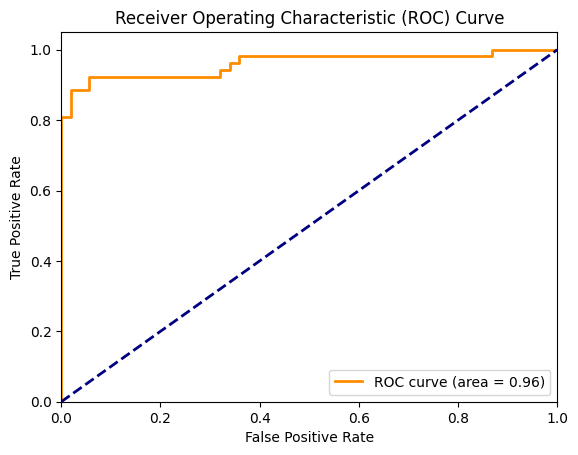

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [41]:
from sklearn.ensemble import RandomForestClassifier

# Train RandomForest model
rf_model = RandomForestClassifier(random_state=2)
rf_model.fit(X_train, Y_train)

# Predict and evaluate performance
rf_test_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(Y_test, rf_test_pred)
print('Random Forest Test Accuracy:', rf_accuracy)


Random Forest Test Accuracy: 0.9142857142857143


In [42]:
model = LogisticRegression(solver='lbfgs', C=10, max_iter=500)


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LogisticRegression(solver='lbfgs', C=10, max_iter=500)
model.fit(X_scaled, Y)


LogisticRegression(C=10, max_iter=500)

In [45]:
model = LogisticRegression(solver='newton-cg', C=10, max_iter=500)


In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LogisticRegression(solver='newton-cg', C=10, max_iter=500)
model.fit(X_scaled, Y)

LogisticRegression(C=10, max_iter=500, solver='newton-cg')

In [52]:
# prompt: create gui for the above

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load the dataset (replace with your actual path)
credit_card_data = pd.read_csv("/content/creditcard.csv")

# Preprocessing steps (same as your existing code)
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]
legit_sample = legit.sample(n=262)
new_dataset = pd.concat([legit_sample, fraud], axis=0)
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


def train_and_evaluate(model_type, C_value, solver_type):
    if model_type == "Logistic Regression":
      model = LogisticRegression(solver=solver_type, C=C_value, max_iter=500)
    elif model_type == "Random Forest":
      model = RandomForestClassifier(random_state=2)

    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"{model_type} Accuracy: {accuracy}")

    # ... (rest of your evaluation code: confusion matrix, classification report, ROC curve)
    # Adapt the existing evaluation code blocks to use 'y_pred'

# Create GUI elements
model_dropdown = widgets.Dropdown(
    options=["Logistic Regression", "Random Forest"],
    value="Logistic Regression",
    description="Model:"
)

c_slider = widgets.FloatSlider(
    value=1.0,
    min=0.1,
    max=10.0,
    step=0.1,
    description="C Value (for Logistic Regression):"
)

solver_dropdown = widgets.Dropdown(
    options=["lbfgs", "newton-cg", "liblinear", "sag", "saga"],
    value="lbfgs",
    description="Solver:"
)

button = widgets.Button(description="Train and Evaluate")
output = widgets.Output()


# Define button click handler
def on_button_clicked(b):
    with output:
        clear_output()
        train_and_evaluate(model_dropdown.value, c_slider.value, solver_dropdown.value)

button.on_click(on_button_clicked)

# Display the GUI
display(model_dropdown, c_slider, solver_dropdown, button, output)

Dropdown(description='Model:', options=('Logistic Regression', 'Random Forest'), value='Logistic Regression')

FloatSlider(value=1.0, description='C Value (for Logistic Regression):', max=10.0, min=0.1)

Dropdown(description='Solver:', options=('lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'), value='lbfgs')

Button(description='Train and Evaluate', style=ButtonStyle())

Output()

In [51]:
# prompt: create gui which include the credit card fraud detection and will let the user know about what is happening

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load the dataset (replace with your actual path)
credit_card_data = pd.read_csv("/content/creditcard.csv")

# Preprocessing steps (same as your existing code)
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]
legit_sample = legit.sample(n=262)
new_dataset = pd.concat([legit_sample, fraud], axis=0)
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


def train_and_evaluate(model_type, C_value, solver_type):
    if model_type == "Logistic Regression":
      model = LogisticRegression(solver=solver_type, C=C_value, max_iter=500)
    elif model_type == "Random Forest":
      model = RandomForestClassifier(random_state=2)

    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"{model_type} Accuracy: {accuracy}")

    # Confusion Matrix
    cm = confusion_matrix(Y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Classification Report
    cr = classification_report(Y_test, y_pred)
    print("Classification Report:")
    print(cr)

    # Get the predicted probabilities
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(Y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


# Create GUI elements
model_dropdown = widgets.Dropdown(
    options=["Logistic Regression", "Random Forest"],
    value="Logistic Regression",
    description="Model:"
)

c_slider = widgets.FloatSlider(
    value=1.0,
    min=0.1,
    max=10.0,
    step=0.1,
    description="C Value (for Logistic Regression):"
)

solver_dropdown = widgets.Dropdown(
    options=["lbfgs", "newton-cg", "liblinear", "sag", "saga"],
    value="lbfgs",
    description="Solver:"
)

button = widgets.Button(description="Train and Evaluate")
output = widgets.Output()


# Define button click handler
def on_button_clicked(b):
    with output:
        clear_output()
        train_and_evaluate(model_dropdown.value, c_slider.value, solver_dropdown.value)

button.on_click(on_button_clicked)

# Display the GUI
display(model_dropdown, c_slider, solver_dropdown, button, output)

Dropdown(description='Model:', options=('Logistic Regression', 'Random Forest'), value='Logistic Regression')

FloatSlider(value=1.0, description='C Value (for Logistic Regression):', max=10.0, min=0.1)

Dropdown(description='Solver:', options=('lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'), value='lbfgs')

Button(description='Train and Evaluate', style=ButtonStyle())

Output()